In [1]:
from google.colab import files
uploaded = files.upload()

Saving FER.zip to FER.zip


In [2]:
!unzip -q FER.zip
import os
os.listdir(".")

['.config', 'train', 'FER.zip', 'test', 'sample_data']

In [3]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, Flatten,
    Dense, Dropout, Reshape, LSTM
)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


In [4]:
IMG_SIZE = 48
BATCH_SIZE = 64
EPOCHS = 30

TRAIN_DIR = "train"
TEST_DIR = "test"


In [5]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.3,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)
test_datagen = ImageDataGenerator(rescale=1./255)


In [6]:
train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    color_mode="grayscale",
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training",
    shuffle=True
)


Found 20099 images belonging to 7 classes.


In [7]:
val_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    color_mode="grayscale",
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation",
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    color_mode="grayscale",
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)


Found 8610 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [8]:
model = Sequential()

model.add(Conv2D(64, (3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(256, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Reshape((1, -1)))

model.add(LSTM(128))
model.add(Dropout(0.5))

model.add(Dense(7, activation='softmax'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(
    optimizer=Adam(learning_rate=0.0004),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


In [10]:
model.summary()
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator
)
test_loss, test_acc = model.evaluate(test_generator)
print("Test Accuracy:", test_acc)



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 1, 4096)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │     2,163,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,533,767 (9.67 MB)

 Trainable params: 2,533,767 (9.67 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


315/315 ━━━━━━━━━━━━━━━━━━━━ 28s 73ms/step - accuracy: 0.2360 - loss: 1.8336 - val_accuracy: 0.2632 - val_loss: 1.7780
Epoch 2/30
315/315 ━━━━━━━━━━━━━━━━━━━━ 22s 71ms/step - accuracy: 0.2794 - loss: 1.7589 - val_accuracy: 0.3269 - val_loss: 1.6726
Epoch 3/30
315/315 ━━━━━━━━━━━━━━━━━━━━ 22s 71ms/step - accuracy: 0.3437 - loss: 1.6613 - val_accuracy: 0.3764 - val_loss: 1.5973
Epoch 4/30
315/315 ━━━━━━━━━━━━━━━━━━━━ 45s 84ms/step - accuracy: 0.3804 - loss: 1.5855 - val_accuracy: 0.3964 - val_loss: 1.5406
Epoch 5/30
315/315 ━━━━━━━━━━━━━━━━━━━━ 37s 72ms/step - accuracy: 0.4093 - loss: 1.5360 - val_accuracy: 0.4311 - val_loss: 1.4807
Epoch 6/30
315/315 ━━━━━━━━━━━━━━━━━━━━ 25s 78ms/step - accuracy: 0.4231 - loss: 1.4999 - val_accuracy: 0.4202 - val_loss: 1.4814
Epoch 7/30
315/315 ━━━━━━━━━━━━━━━━━━━━ 24s 75ms/step - accuracy: 0.4452 - loss: 1.4516 - val_accuracy: 0.4548 - val_loss: 1.4319
Epoch 8/30
315/315 ━━━━━━━━━━━━━━━━━━━━ 22s 71ms/step - accuracy: 0.4646 - loss: 1.4135 - val_accurac

113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step


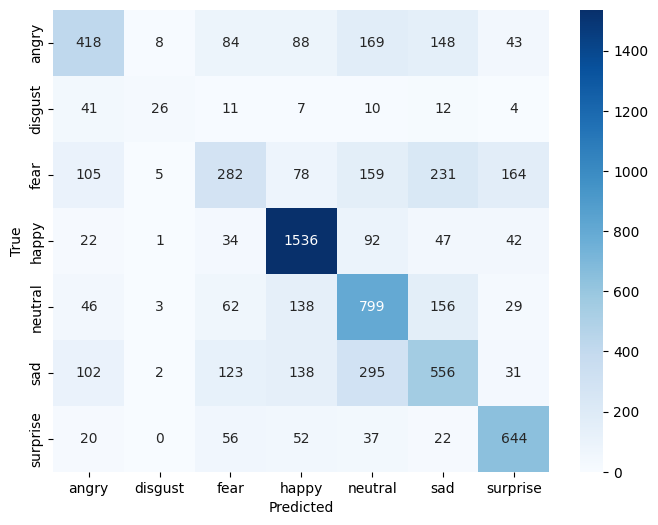

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [12]:
model.save("fer_cnn_lstm_model.h5")


In [13]:
pip install opencv-python tensorflow numpy


In [14]:
from google.colab import files
uploaded = files.upload()


Saving images (2).jpg to images (2).jpg


In [15]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

model = tf.keras.models.load_model("fer_cnn_lstm_model.h5")

emotion_labels = ['Angry','Disgust','Fear','Happy','Sad','Surprise','Neutral']

face_cascade = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)


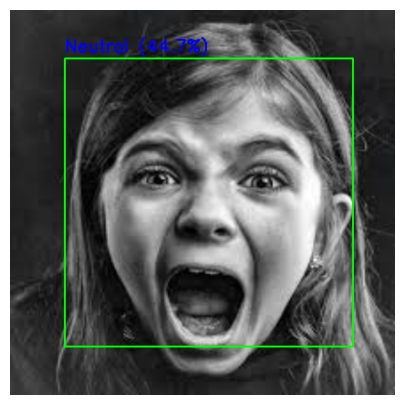

In [16]:
for file_name in uploaded.keys():

    img = cv2.imread(file_name)

    img = cv2.resize(img, (600, 600))

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(50, 50)
    )

    if len(faces) == 0:
        print("❌ No face detected in image")
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.axis("off")
        plt.show()
        continue

    for (x, y, w, h) in faces:
        face = gray[y:y+h, x:x+w]
        face = cv2.resize(face, (48, 48))
        face = face / 255.0
        face = face.reshape(1, 48, 48, 1)

        pred = model.predict(face, verbose=0)
        emotion = emotion_labels[np.argmax(pred)]
        confidence = np.max(pred) * 100

        cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)
        cv2.putText(
            img,
            f"{emotion} ({confidence:.1f}%)",
            (x, y-10),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.9,
            (255, 0, 0),
            2
        )

    plt.figure(figsize=(5,5))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Predicted emotion: Fear


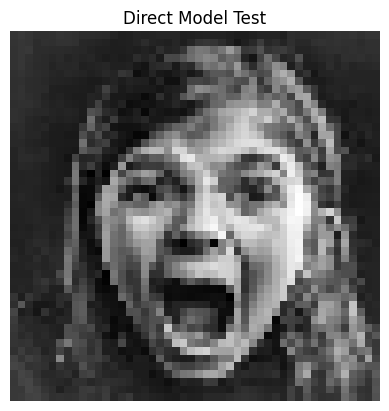

In [17]:
import matplotlib.pyplot as plt

img = cv2.imread(file_name, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (48,48))
img = img / 255.0
img = img.reshape(1,48,48,1)

pred = model.predict(img)
print("Predicted emotion:", emotion_labels[np.argmax(pred)])

plt.imshow(img.reshape(48,48), cmap="gray")
plt.title("Direct Model Test")
plt.axis("off")
plt.show()
